K Means Clustering
**************************************************
WCSS for cluster range [400.0, 270.66820496844673, 157.70400815035947, 108.92131661364357, 65.56840815571681, 55.057348270385994, 44.86475569922556, 37.19678168271214, 32.377243774440345]
Clustering of the data points using K Means [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 5 0 5 0
 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5]
Accuracy Score 0.53976103063432

WCSS for KMeans Clustering 55.057348270385994


DBSCAN
********************************************************
Labels [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

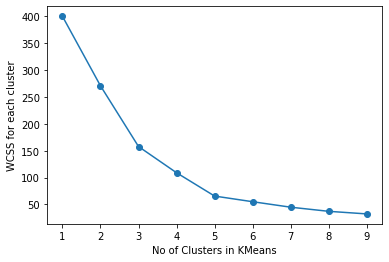

In [46]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans,DBSCAN

#Import the dataset and normalize the data 
data=pd.read_csv('C:/Users/Sandeep.Vasudevan/OneDrive - EY/Desktop/Keras/Mall_Customers.csv')
X=data.iloc[:,3:5]
standardScaler=StandardScaler()
scaledData=standardScaler.fit_transform(X)

#Implementing K Means
print('K Means Clustering')
print('**************************************************')
WCSS=[]
for cluster in range(1,10):
    model_KMeans=KMeans(n_clusters=cluster,init='k-means++')
    model_KMeans.fit(scaledData)
    y_kmeans=model_KMeans.fit_predict(scaledData)
    WCSS.append(model_KMeans.inertia_)
    
dataset=pd.DataFrame({'Cluster':range(1,10),'WCSS':WCSS})   
plt.plot(dataset['Cluster'],dataset['WCSS'],marker='o')
plt.xlabel('No of Clusters in KMeans')
plt.ylabel('WCSS for each cluster')

print('WCSS for cluster range',WCSS)
    
model_KMeans=KMeans(n_clusters=6,init='k-means++')
model_KMeans.fit(scaledData)
labels=model_KMeans.labels_
y_kmeans=model_KMeans.fit_predict(scaledData)
print('Clustering of the data points using K Means',y_kmeans)
print('Accuracy Score',metrics.silhouette_score(X,labels))
print()
print('WCSS for KMeans Clustering',model_KMeans.inertia_)
print()
print()
print('DBSCAN')
print('********************************************************')


#Implementing DB Scan
dbscan=DBSCAN(eps=3,min_samples=4)
model=dbscan.fit(X)
labels=model.labels_
print('Labels',labels)
cores=np.zeros_like(labels,dtype=bool)
cores[dbscan.core_sample_indices_]=True
num_clusters=len(set(labels))-(1 if -1 in labels else 0)
print('Numbers of clusters in DBSCAN',num_clusters)
print('Accuracy Score for DBSCAN',metrics.silhouette_score(X,labels))